In [28]:
import numpy as np
import pydicom as dicom
import os
import matplotlib.pyplot as plt
from glob import glob

In [29]:
data_path = 'F:/University/Terms/term9/AI/DetectionMRI/MedPy/dataset/'
output_path = working_path = 'F:/University/'
g = glob(data_path + '/*.dcm')

# Print out the first 5 file names to verify we're in the right folder.
print ('Total of %d DICOM images. First 5 filenames:' % len(g))


Total of 420 DICOM images. First 5 filenames:


In [30]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)      
    for s in slices:
        s.SliceThickness = slice_thickness    
    return slices


In [38]:
def get_pixels_hu(scans):
    
    image = np.stack([s.pixel_array for s in scans])
    image = image.astype(np.int16)
    maxElement = np.amax(image)
    minElement = np.amin(image)
    print('Max element from Numpy Array : ', maxElement)
    print('Min element from Numpy Array : ', minElement)
    image[image == -2000] = 0
   
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope 
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    maxElement = np.amax(image)
    minElement = np.amin(image)
    print('After Calculation of HU: Max element from Numpy Array : ', maxElement)
    print('After Calculation of HU: Min element from Numpy Array : ', minElement)
    return np.array(image, dtype=np.int16)

id=0
patient = load_scan(data_path)
imgs = get_pixels_hu(patient)

Max element from Numpy Array :  32767
Min element from Numpy Array :  -32768
After Calculation of HU: Max element from Numpy Array :  24875
After Calculation of HU: Min element from Numpy Array :  -26982


In [9]:
np.save(output_path + "fullimages_%d.npy" % (id), imgs)

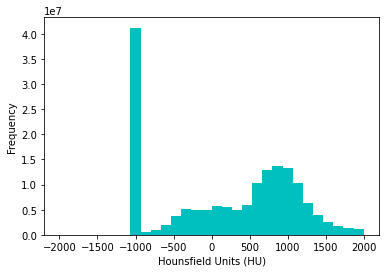

In [10]:
file_used=output_path+"fullimages_%d.npy" % id
imgs_to_process = np.load(file_used).astype(np.float64) 

plt.hist(imgs_to_process.flatten(), range=[-2000, 2000], bins=30, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

In [7]:
from itkwidgets import view

KeyboardInterrupt: 

In [5]:
view(imgs)

NameError: name 'imgs' is not defined